非線形回帰分析

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df = pd.read_csv('sample08_2_3.csv')

In [47]:
# データをtype別に分割する

t1 = df[df.type == 1]
t2 = df[df.type == 2]

(0, 10)

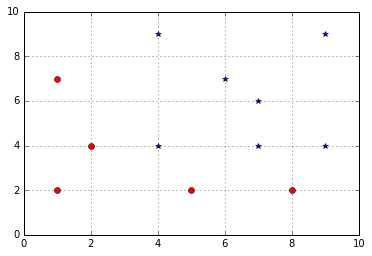

In [48]:
# 分割した各点を描画してみる

plt.plot(t1['x'],t1['y'],'ro')
plt.plot(t2['x'],t2['y'],'b*')

plt.grid()
plt.xlim(0,10)
plt.ylim(0,10)

In [49]:
# 試しに線形SVMを使ってみる
from sklearn import svm
from sklearn import linear_model
import numpy as np

clf=svm.LinearSVC()
clf.fit(df[['x','y']],df['type'])
# clt 分類という意味

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [50]:
# 線形SVMの結果をグラフに描画
# 各係数を書き出す
# 数値は、配列を指している
# coefは、２次元配列
# interceptは、１次元配列となってる

In [51]:
a = clf.coef_[0][0]
b = clf.coef_[0][1]
c = clf.intercept_[0]

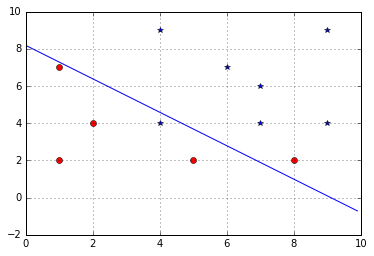

In [52]:
x = np.arange(0,10,0.1)
plt.plot(x,(-a*x-c)/b)

# 赤丸や青い星がお描画させなかったので、以下の内容を一緒に入力したら描画された
plt.plot(t1['x'],t1['y'],'ro')
plt.plot(t2['x'],t2['y'],'b*')
plt.grid()

# 正しく分類されれいない　丸と星の分類が違う
# この場合は、直線である為、正しく分類できない
# これを実現できるのはカーネルトリックという手法
# カーネルには、いくつか種類がる　多項式カーネル、RBFカーネル、シグモイドカーネル

# 計算処理は、scikit-learn内部で行われる為、どのカーネルを使用するか必要に応じてパラメーターを設定すれば良い
#　ここでは、多項式カーネルを設定してみる

In [53]:
clf2 = svm.SVC(kernel='poly')

In [60]:
clf2.fit(df[['x','y']],df['type'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [62]:
clf2.predict([[4,4],[8,2]])

# 青星（２）赤丸（１）と表示される

array([2, 1])

### 第４項　非線形SVMの可視化

In [72]:
y=x
X,Y=np.meshgrid(x,y)

#meshgridで格子点を作る

In [73]:
X,Y
# X,Yを表示して確認してみる

(array([[ 0. ,  0.1,  0.2, ...,  9.7,  9.8,  9.9],
        [ 0. ,  0.1,  0.2, ...,  9.7,  9.8,  9.9],
        [ 0. ,  0.1,  0.2, ...,  9.7,  9.8,  9.9],
        ..., 
        [ 0. ,  0.1,  0.2, ...,  9.7,  9.8,  9.9],
        [ 0. ,  0.1,  0.2, ...,  9.7,  9.8,  9.9],
        [ 0. ,  0.1,  0.2, ...,  9.7,  9.8,  9.9]]),
 array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
        [ 0.1,  0.1,  0.1, ...,  0.1,  0.1,  0.1],
        [ 0.2,  0.2,  0.2, ...,  0.2,  0.2,  0.2],
        ..., 
        [ 9.7,  9.7,  9.7, ...,  9.7,  9.7,  9.7],
        [ 9.8,  9.8,  9.8, ...,  9.8,  9.8,  9.8],
        [ 9.9,  9.9,  9.9, ...,  9.9,  9.9,  9.9]]))

In [82]:
pair = np.c_[X.ravel(),Y.ravel()]
#np.c_は、２軸を１つの記号にまとめて等高線を作る時に使う

# X,Yは、X座標とY座標に分かれている為これを先ほどのように(0,0)のようなx,yの組（ペア）に変換する必要がある
# これには、「　ravel　」というメソッドと「　np.c_　」というオブジェクトを使用する。
# また、no.c_　のイメージは、zip関数のような事をしていて、x,yの組の配列が作られているというように理解した

# ravelについて 一次元に変換できる　変換前[1,2][3,4]だとすると、変換後[1,2,3,4]に変換できる

In [75]:
pair = np.c_[X.ravel(),Y.ravel()]
# 組に変換できたら先ほど学習させたSVMを利用して格子点での値を計算する

In [77]:
Z = clf2.predict(pair)
# Zに　clf（分類）.predict（予測）.pair（値）を代入
# これで全てのデータが揃った

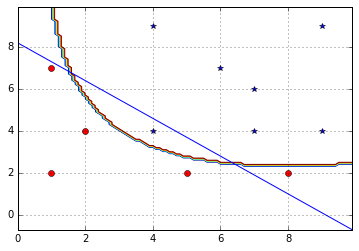

In [83]:
# 最後にmatplotlibのcoutour関数を使用すれば高等線が引ける
# ZをXと同じ形状（100×100配列）に変換する必要がある= Z.reshape(X.shape)

# 非線形SVMのplot
plt.contour(X,Y,Z.reshape(X.shape))

# 直線のplot( 線形SVMの結果)
x = np.arange(0,10,0.1)
plt.plot(x,(-a*x-c)/b)


# 赤丸や青い星が描画されなかったので、以下の内容を一緒に入力
plt.plot(t1['x'],t1['y'],'ro')
plt.plot(t2['x'],t2['y'],'b*')
plt.grid()

In [90]:
clf3 = svm.SVC(kernel='rbf')
clf3.fit(df[['x','y']],df['type'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

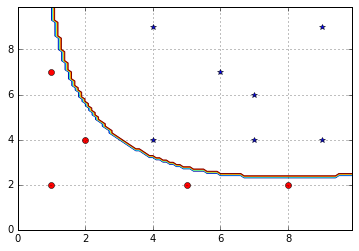

In [94]:
# 高等線の描画
Z = clf2.predict(pair)
plt.contour(X,Y,Z.reshape(X.shape))

# 赤丸や青い星を描画
plt.plot(t1['x'],t1['y'],'ro')
plt.plot(t2['x'],t2['y'],'b*')
plt.grid()